In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
profile = ProfileReport(df)

# EDA


In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

So as from the profile report we can observe that.. there are no missing values, there are 6 numerical and 9 categorical varaibles. Also there are 23 duplicate entries.. which we need to drop. Also the capital gain and capital loss columns have 91 and 95 percent of the values as 0. So we can drop those two columns. Also the country and the workclass column has some garbage entries in the form of '?' , which accounts for 583 and 1836 entries respectively.

In [5]:
question_mark = set()
for i in range(32561):
    for j in range(15):
        if df.iloc[i][j] == " ?":
            question_mark.add(df.index[i])

In [6]:
len(question_mark)

2399

Now as we have got the indexes of the places where ? is present. So now we can drop those entries.

In [7]:
df.drop(index=question_mark , inplace = True)

In [8]:
df.reset_index(drop=True , inplace=True)

In [9]:
df.shape

(30162, 15)

In [10]:
for i in df.columns:
    print("Unique categories in {} feature is:\n{}\n\n".format(i , df[i].unique()))

Unique categories in age feature is:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]


Unique categories in workclass feature is:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


Unique categories in fnlwgt feature is:
[ 77516  83311 215646 ...  84661 257302 201490]


Unique categories in education feature is:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


Unique categories in education-num feature is:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


Unique categories in marital-status feature is:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed

As earlier in the pandas profile report we saw that thier were 23 duplicate entries. So we need to drop those values.

In [11]:
  df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now as per the pandas profile report we observed that in capital gain and capital loss column almost 90% of the values are 0. Here we have two ways , either we can replace the 0 with some values or we can drop those columns. If we go by the first option ,then we will have to replace more than 25K values , which is not a vice option. So we will drop those columns.

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [13]:
df.drop(['capital-loss' ,'capital-gain'] , axis = 1 , inplace = True)

In [14]:
num_var = [features for features in df.columns if df[features].dtype != 'O']

In [15]:
cat_var = [features for features in df.columns if df[features].dtype == 'O']

Now we have to convert all the categorical features to numerical ones.

In [16]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [17]:
df.replace({' Male':0 , ' Female':1} , inplace = True)

In [18]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
df.replace({' <=50K':0 , ' >50K':1} , inplace = True)

In [20]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
north_america = [' United-States' , ' Canada' , ' Outlying-US(Guam-USVI-etc)' , ' Mexico' , ' Cuba' , ' Jamaica' , ' Dominican-Republic' , ' El-Salvador' , ' Puerto-Rico' , ' Honduras',' Haiti' , ' Guatemala' , ' Nicaragua']

In [22]:
south_america =[' Columbia' ,  ' Ecuador' , ' Peru' ,' Trinadad&Tobago' , ' South']

In [23]:
asia = [' Cambodia',' India' , ' China' , ' Taiwan' , ' Iran', ' Philippines' , ' Thailand' , ' Laos' , ' Japan' , ' Vietnam', ' Hong', ' Hungary']

In [24]:
europe = [' England',  ' Germany' , ' France' ,' Poland' , ' Portugal' , ' Italy' , ' Yugoslavia' , ' Scotland' , ' Greece' , ' Ireland' , ' Holand-Netherlands']

In [25]:
df.replace(to_replace=north_america,value='North-America',inplace=True)

In [26]:
df.replace(to_replace=south_america , value='South-America' , inplace = True)

In [27]:
df.replace(to_replace=asia , value = 'Asia' , inplace = True)

In [28]:
df.replace(to_replace=europe , value = 'Europe' , inplace= True)

In [29]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,North-America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,North-America,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,North-America,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,North-America,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,North-America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,38,North-America,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,40,North-America,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,40,North-America,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,20,North-America,0


Now to convert all the other categorical features we will use lable encoder from sklearn

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lable_encoded_data = df.apply(LabelEncoder().fit_transform)

In [32]:
lable_encoded_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,22,5,2491,9,12,4,0,1,4,0,39,2,0
1,33,4,2727,9,12,2,3,0,4,0,12,2,0
2,21,2,13188,11,8,0,5,1,4,0,39,2,0
3,36,2,14354,1,6,2,5,0,2,0,39,2,0
4,11,2,18120,9,12,2,9,5,2,1,39,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,10,2,15471,7,11,2,12,5,4,1,37,2,0
30158,23,2,7555,11,8,2,6,0,4,0,39,2,1
30159,41,2,7377,11,8,6,0,4,4,1,39,2,0
30160,5,2,12060,11,8,4,0,3,4,0,19,2,0


In [33]:
lable_encoded_data.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int64
hours-per-week    int64
country           int32
salary            int64
dtype: object

So now we can see that all the features have been converted to numerical features.

In [34]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

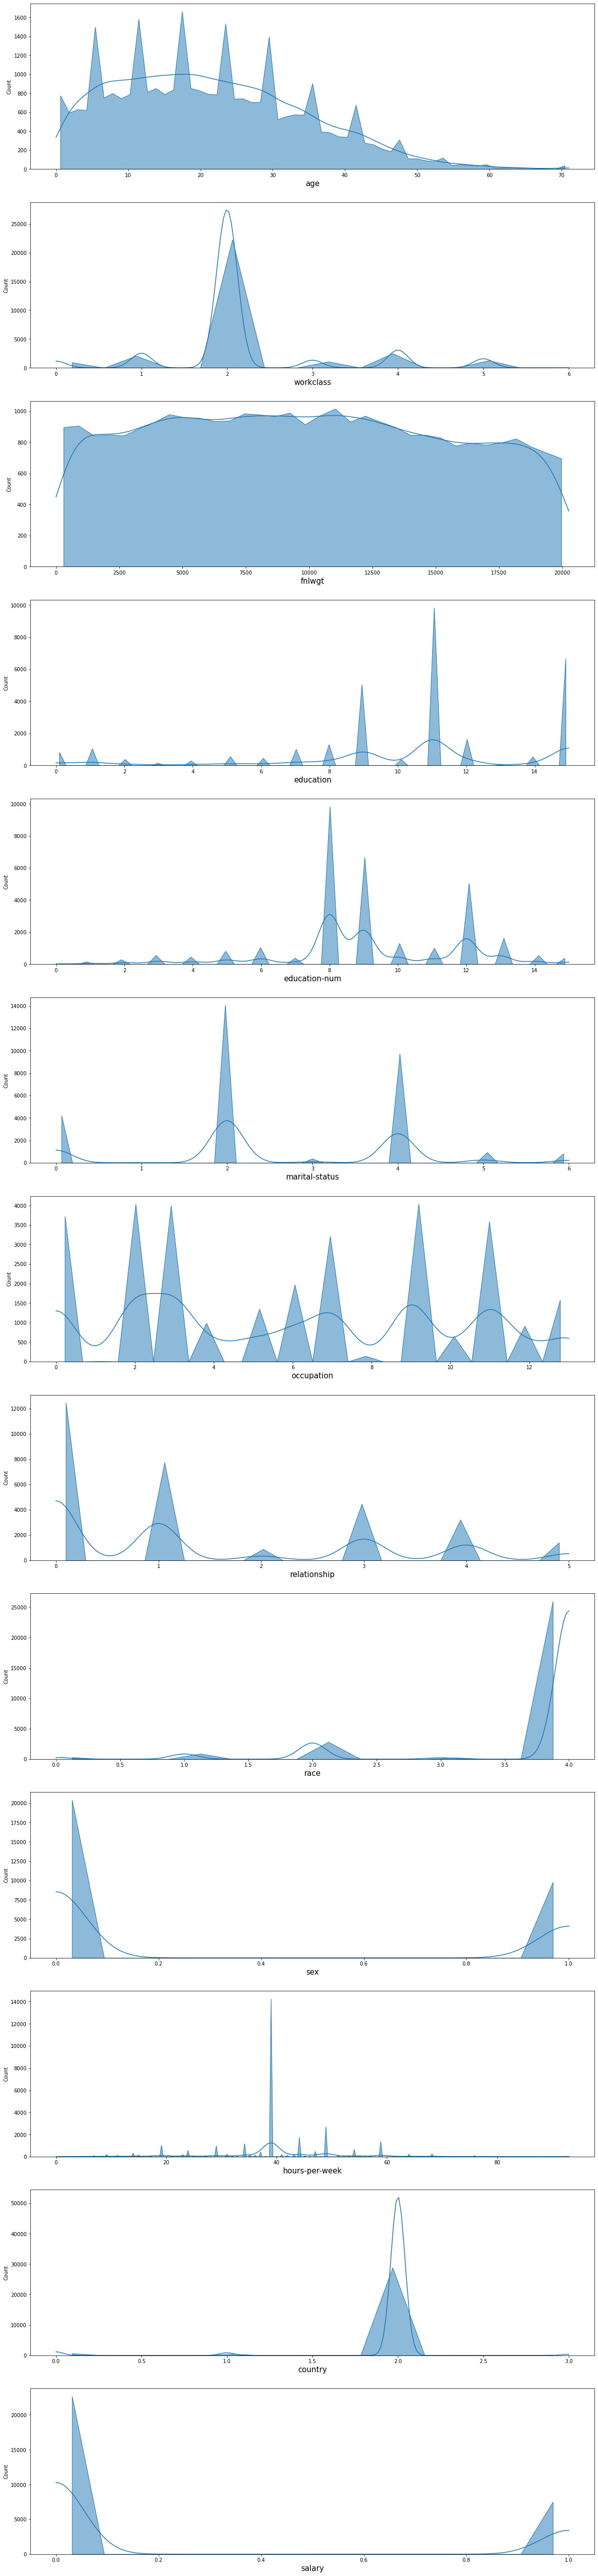

In [35]:
plt.figure(figsize=(20,100))
i = 1

for features in lable_encoded_data.columns:
    if i <=14:
        ax = plt.subplot(14 ,1 , i)
        sns.histplot(lable_encoded_data[features] , kde = True , element='poly')
        plt.xlabel(features , fontsize = 15)
    i+=1
plt.show()


The above histogram shows that the data is not normally distributed.
The data normalization will be carried out in the further analysis of the data.
Excluding the columns which has boolean values

C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AAKASH\anacon

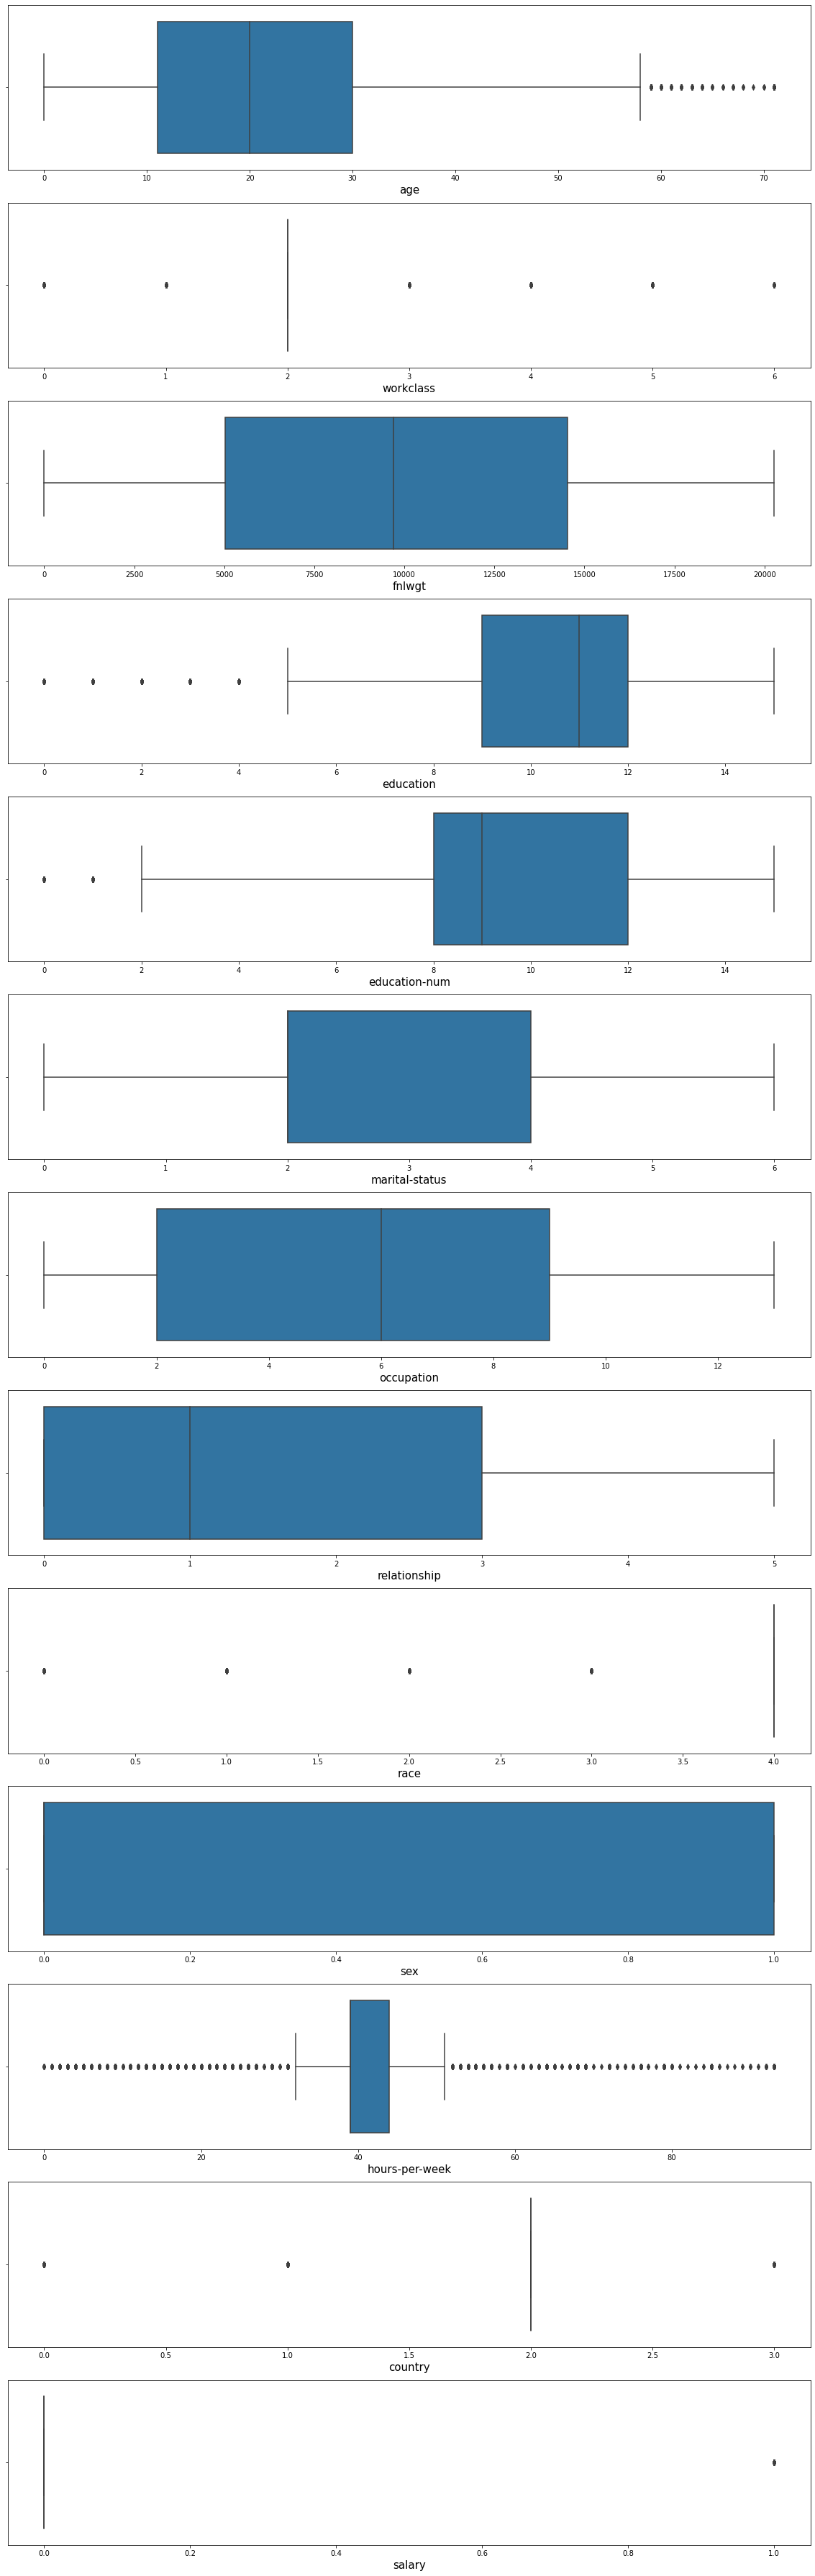

In [36]:
plt.figure(figsize=(20,70))
i = 1

for features in lable_encoded_data.columns:
    if i <=14:
        ax = plt.subplot(14 ,1 , i)
        sns.boxplot(lable_encoded_data[features])
        plt.xlabel(features , fontsize = 15)
    i+=1
plt.show()

Now as per the above box plots it can be seen that their are outliers in age and hours per week column.

In [37]:
Q1 = np.percentile(lable_encoded_data['age'] , 25 , interpolation='midpoint')
Q3 = np.percentile(lable_encoded_data['age'] , 75 , interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

upper = np.where(lable_encoded_data['age'] >= (Q3+1.5*IQR))
lower = np.where(lable_encoded_data['age'] <= (Q1-1.5*IQR))

lable_encoded_data.drop(upper[0] , inplace=True)
lable_encoded_data.drop(lower[0] , inplace=True)
print(lable_encoded_data.shape)

19.0
(29993, 13)


<AxesSubplot:>

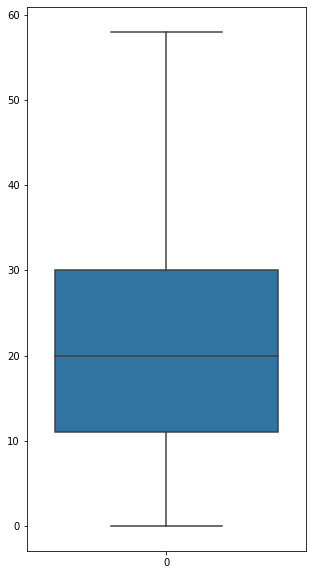

In [38]:
plt.figure(figsize =(5,10))
sns.boxplot(data = lable_encoded_data['age'])

So the outliers from the age column have been removed.
Now for the hours column there are many outliers...so before we take the step of removing the outliers in the hours column lets check if the data is normally distributed. Because if the data is normally distributed then it is fine..as number of hours worked per week actually depends upon each individually , and as there are many outliers..there must be some sort of trend behind it as well. 


In [39]:
lable_encoded_data.to_csv("OutliersRemoved.csv" , index=False)

In [41]:
lable_encoded_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary'],
      dtype='object')

In [ ]:
for i in df.columns:
    print("Unique categories in {} feature is:\n{}\n\n".format(i , df[i].unique()))

In [45]:
for i in lable_encoded_data.columns:
    print("Unique Feature in {} are {}".format(i , lable_encoded_data[i].unique()))

Unique Feature in age are [22 33 21 36 11 20 32 35 14 25 13  6 15 17  8 26 23 37 18 42 39  2  3 28
  5 31  4  7 40 27 24 12 30 29 19 10  1 16 38 44 53 47 54 49 34 41  9  0
 43 58 48 45 46 50 57 55 52 51 56]
Unique Feature in workclass are [5 4 2 0 1 3 6]
Unique Feature in fnlwgt are [ 2491  2727 13188 ...  2802 15471 12060]
Unique Feature in education are [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Unique Feature in education-num are [12  8  6 13  4  9 11  3 15 10 14  2  5  0  7  1]
Unique Feature in marital-status are [4 2 0 3 5 1 6]
Unique Feature in occupation are [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Unique Feature in relationship are [1 0 5 3 4 2]
Unique Feature in race are [4 2 1 0 3]
Unique Feature in sex are [0 1]
Unique Feature in hours-per-week are [39 12 15 44 49 76 29 34 59 19 51 43 14 24 42 37 54 47 57 31 68 21 55 40
 27 35 23 45  1 41 11 64  0 33 72 92 32 53  9  5 63 18 17 69  7  8 46 36
 20 25 13  4  6 93 52 38 61 58 56 75 85 65 10 48 79 16 67  2 26 80 30 50


In [46]:
le = LabelEncoder()

In [49]:
df = pd.DataFrame({
    'index' : [0 , 1 ,2 ,3,4,5,6],
    'workclass' : ['State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
})
df['workclass_encoded'] = le.fit_transform(df['workclass'].values)
df = df.drop_duplicates('workclass').set_index('index')
print(df)

               workclass  workclass_encoded
index                                      
0              State-gov                  6
1       Self-emp-not-inc                  4
2                Private                  2
3            Federal-gov                  0
4              Local-gov                  1
5           Self-emp-inc                  3
6            Without-pay                  5


In [54]:
df = pd.DataFrame({
    'index' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'education' : [' Bachelors' ,' HS-grad', ' 11th', ' Masters' ,' 9th' ,' Some-college',
                ' Assoc-acdm', ' 7th-8th' ,' Doctorate' ,' Assoc-voc' ,' Prof-school',
                 ' 5th-6th' ,' 10th' ,' Preschool' ,' 12th', ' 1st-4th']
})
df['education_encoded'] = le.fit_transform(df['education'].values)
df = df.drop_duplicates('education').set_index('index')
print(df)

           education  education_encoded
index                                  
0          Bachelors                  9
1            HS-grad                 11
2               11th                  1
3            Masters                 12
4                9th                  6
5       Some-college                 15
6         Assoc-acdm                  7
7            7th-8th                  5
8          Doctorate                 10
9          Assoc-voc                  8
10       Prof-school                 14
11           5th-6th                  4
12              10th                  0
13         Preschool                 13
14              12th                  2
15           1st-4th                  3


In [55]:
df = pd.DataFrame({
    'index' : [0 , 1 ,2 ,3,4,5,6],
    'martial_status' : [' Never-married' ,' Married-civ-spouse', ' Divorced',
 ' Married-spouse-absent' ,' Separated', ' Married-AF-spouse', ' Widowed']

})
df['martial_status_encoded'] = le.fit_transform(df['martial_status'].values)
df = df.drop_duplicates('martial_status').set_index('index')
print(df)

               martial_status  martial_status_encoded
index                                                
0               Never-married                       4
1          Married-civ-spouse                       2
2                    Divorced                       0
3       Married-spouse-absent                       3
4                   Separated                       5
5           Married-AF-spouse                       1
6                     Widowed                       6


In [57]:
df = pd.DataFrame({
    'index' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13],
    'occupation' : [' Adm-clerical' ,' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
 ' Other-service', ' Sales' ,' Transport-moving' ,' Farming-fishing',
 ' Machine-op-inspct' ,' Tech-support', ' Craft-repair', ' Protective-serv',
 ' Armed-Forces', ' Priv-house-serv']

})
df['occupation_encoded'] = le.fit_transform(df['occupation'].values)
df = df.drop_duplicates('occupation').set_index('index')
print(df)

               occupation  occupation_encoded
index                                        
0            Adm-clerical                   0
1         Exec-managerial                   3
2       Handlers-cleaners                   5
3          Prof-specialty                   9
4           Other-service                   7
5                   Sales                  11
6        Transport-moving                  13
7         Farming-fishing                   4
8       Machine-op-inspct                   6
9            Tech-support                  12
10           Craft-repair                   2
11        Protective-serv                  10
12           Armed-Forces                   1
13        Priv-house-serv                   8


In [58]:
df = pd.DataFrame({
    'index' : [0,1,2,3,4,5],
    'relationship' : [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
 ' Other-relative']

})
df['relationship_encoded'] = le.fit_transform(df['relationship'].values)
df = df.drop_duplicates('relationship').set_index('index')
print(df)

          relationship  relationship_encoded
index                                       
0        Not-in-family                     1
1              Husband                     0
2                 Wife                     5
3            Own-child                     3
4            Unmarried                     4
5       Other-relative                     2


In [59]:
df = pd.DataFrame({
    'index' : [0,1,2,3,4],
    'race' : [' White' ,' Black' ,' Asian-Pac-Islander' ,' Amer-Indian-Eskimo' ,' Other']

})
df['race_encoded'] = le.fit_transform(df['race'].values)
df = df.drop_duplicates('race').set_index('index')
print(df)

                      race  race_encoded
index                                   
0                    White             4
1                    Black             2
2       Asian-Pac-Islander             1
3       Amer-Indian-Eskimo             0
4                    Other             3


In [60]:
df = pd.DataFrame({
    'index' : [0,1,2,3],
    'country' : ['north_america' , 'south_america' , 'asia' , 'europe']

})
df['country_encoded'] = le.fit_transform(df['country'].values)
df = df.drop_duplicates('country').set_index('index')
print(df)

             country  country_encoded
index                                
0      north_america                2
1      south_america                3
2               asia                0
3             europe                1
